## Análisis general del conjunto de datos 

In [3]:
import pandas as pd
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")

# Parámetros
chunk_size = 100_000

# Inicializar variables para resumen
columns = None
total_rows = 0
dates = set()
stores = set()
items = set()
sales_stats = []

# Leer el CSV en fragmentos
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    # Obtener columnas (solo la primera vez)
    if columns is None:
        columns = chunk.columns.tolist()
    
    # Contar filas
    total_rows += len(chunk)
    
    # Recolectar fechas, tiendas y productos únicos
    dates.update(chunk['date'].unique())
    stores.update(chunk['store_id'].unique())
    items.update(chunk['item_id'].unique())
    
    # Estadísticas de sales
    sales_stats.append(chunk['sales'].describe())

# Combinar estadísticas de sales
sales_summary = pd.concat(sales_stats, axis=1).mean(axis=1)

# Imprimir resumen
print("=== Resumen de total_data.csv ===")
print(f"Columnas: {columns}")
print(f"Número total de filas: {total_rows:,}")
print(f"Fechas únicas: {len(dates):,}")
print(f"Tiendas únicas: {len(stores):,}")
print(f"Productos únicos: {len(items):,}")
print("\nEstadísticas de 'sales':")
print(sales_summary)
print("\nPrimeras 5 filas del primer chunk:")
print(pd.read_csv(total_data_path, nrows=5))

=== Resumen de total_data.csv ===
Columnas: ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']
Número total de filas: 59,181,090
Fechas únicas: 1,941
Tiendas únicas: 10
Productos únicos: 3,049

Estadísticas de 'sales':
count    99968.057432
mean         1.131050
std          3.818103
min          0.000000
25%          0.000000
50%          0.000000
75%          0.837838
max        223.974662
dtype: float64

Primeras 5 filas del primer chunk:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES

### Análisis de la salida


Columnas (22):

Identificadores: id, item_id, dept_id, cat_id, store_id, state_id

Ventas: sales

Fecha: date, wm_yr_wk, weekday, wday, month, year

Eventos: event_name_1, event_type_1, event_name_2, event_type_2

SNAP (programa de asistencia): snap_CA, snap_TX, snap_WI

Precio: sell_price

Número de filas: 59,181,090

Fechas únicas: 1,941 (~5.3 años, desde ~2011 a 2016, asumiendo datos diarios)

Tiendas únicas: 10 (coincide con CA_1, CA_2, ..., WI_3)

Productos únicos: 3,049

### Estadísticas de sales:

Media: 1.13 unidades por día

Desviación estándar: 3.82 (alta variabilidad)

Mínimo: 0

Percentiles: 25% y 50% son 0, 75% es 0.84

Máximo: 223.97

Primeras 5 filas:

Muestra datos para HOBBIES_1_001 a HOBBIES_1_005 en CA_1.

Incluye event_name_2 y event_type_2 con valores NaN, lo que sugiere que los eventos secundarios son raros.

Tamaño del dataset:

59M filas es muy grande, pero con chunksize=100,000 lo manejamos.

### Ventas diarias:

La mayoría de las ventas son bajas (50% de los días tienen 0 ventas, 75% tienen ≤0.84). Esto indica que las ventas diarias son esporádicas, lo que justifica agrupar por trimestres o meses para reducir ruido

### El máximo (223.97) sugiere valores atípicos, que podrían afectar modelos sensibles como LSTM.

### Fechas:

1,941 días (~5.3 años) dan ~21 trimestres o ~64 meses. Esto es suficiente para modelar tendencias y estacionalidad, pero las series individuales por producto/tienda son cortas en trimestres (~21 puntos), lo que limita modelos complejos.

### Productos y tiendas:


3,049 productos y 10 tiendas. No todas estarán completas (es decir, no todos los productos se venden en todas las tiendas todos los días).

Seleccionar un subconjunto de productos (como los 10 o 20 más predecibles) será clave para mantener el dataset manejable.

## Visualizar una muestra de series temporales

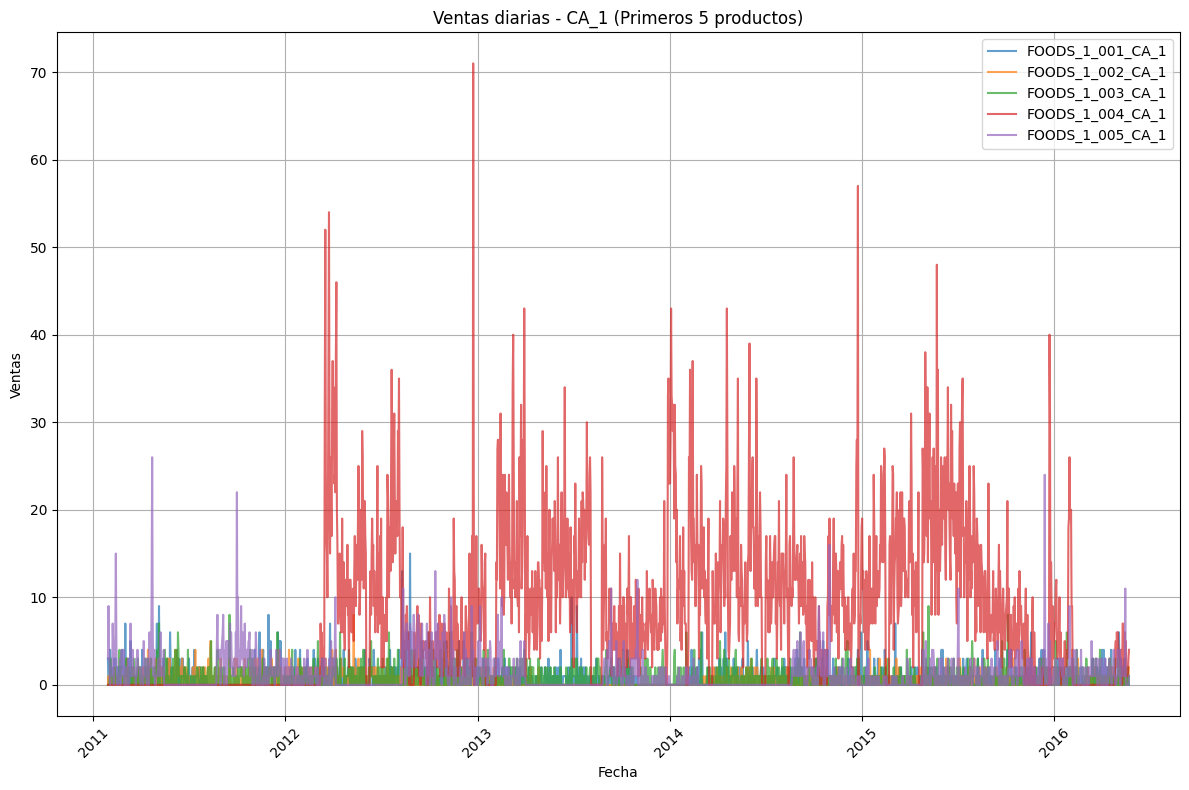


Estadísticas por producto en CA_1:

FOODS_1_001:
count    1941.000000
mean        0.786193
std         1.259658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        15.000000
Name: sales, dtype: float64

FOODS_1_002:
count    1941.000000
mean        0.481195
std         0.804166
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sales, dtype: float64

FOODS_1_003:
count    1941.000000
mean        0.830500
std         1.161059
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: sales, dtype: float64

FOODS_1_004:
count    1941.000000
mean        8.187532
std         8.824338
min         0.000000
25%         0.000000
50%         6.000000
75%        13.000000
max        71.000000
Name: sales, dtype: float64

FOODS_1_005:
count    1941.000000
mean        1.167439
std         2.018546
min         0.000000
25%         0.000000
50%  

In [5]:
import matplotlib.pyplot as plt

# Parámetros
chunk_size = 100_000
store_id = 'CA_1'
n_products = 5

# Obtener los primeros 5 productos únicos
items = set()
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['item_id']):
    items.update(chunk['item_id'].unique())
    if len(items) >= n_products:
        break
items = sorted(list(items))[:n_products]

# Filtrar datos para CA_1 y los 5 productos
filtered_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk_filtered = chunk[
        (chunk['store_id'] == store_id) & 
        (chunk['item_id'].isin(items))
    ][['item_id', 'date', 'sales']]
    filtered_data.append(chunk_filtered)

df_filtered = pd.concat(filtered_data, ignore_index=True)
df_filtered = df_filtered.sort_values(['item_id', 'date'])

# Graficar series temporales
plt.figure(figsize=(12, 8))
for item_id in items:
    df_item = df_filtered[df_filtered['item_id'] == item_id]
    plt.plot(df_item['date'], df_item['sales'], label=f"{item_id}_{store_id}", alpha=0.7)
plt.title(f"Ventas diarias - {store_id} (Primeros {n_products} productos)")
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir estadísticas por producto
print("\nEstadísticas por producto en CA_1:")
for item_id in items:
    sales = df_filtered[df_filtered['item_id'] == item_id]['sales']
    print(f"\n{item_id}:")
    print(sales.describe())

### Ventas diarias ruidosas:


Los primeros cuatro productos tienen series muy esporádicas: la mayoría de los días están en 0, con picos aislados (hasta 10 o 20 ventas). Esto hace que las series diarias sean ruidosas y difíciles de modelar directamente, ya que no hay patrones claros a nivel diario.

La falta de estacionalidad visible (por ejemplo, picos regulares cada diciembre) sugiere que las ventas diarias no tienen un ciclo claro.

Producto especial (FOODS_1_005):

FOODS_1_005 es un caso atípico: comienza más tarde (Q2 2012) y tiene picos mucho más altos (hasta 70 ventas) con subidas y bajadas frecuentes.

Esto indica que FOODS_1_005 podría tener un patrón más definido (quizás estacionalidad o ciclos relacionados con eventos/promociones).


### Confirmación de la necesidad de agrupar:

Agrupar por meses o trimestres sumará las ventas diarias dentro de cada período, reduciendo los ceros y suavizando los picos. Esto debería hacer las series más predecibles.

## Agrupar las ventas por meses y visualizar nuevamente

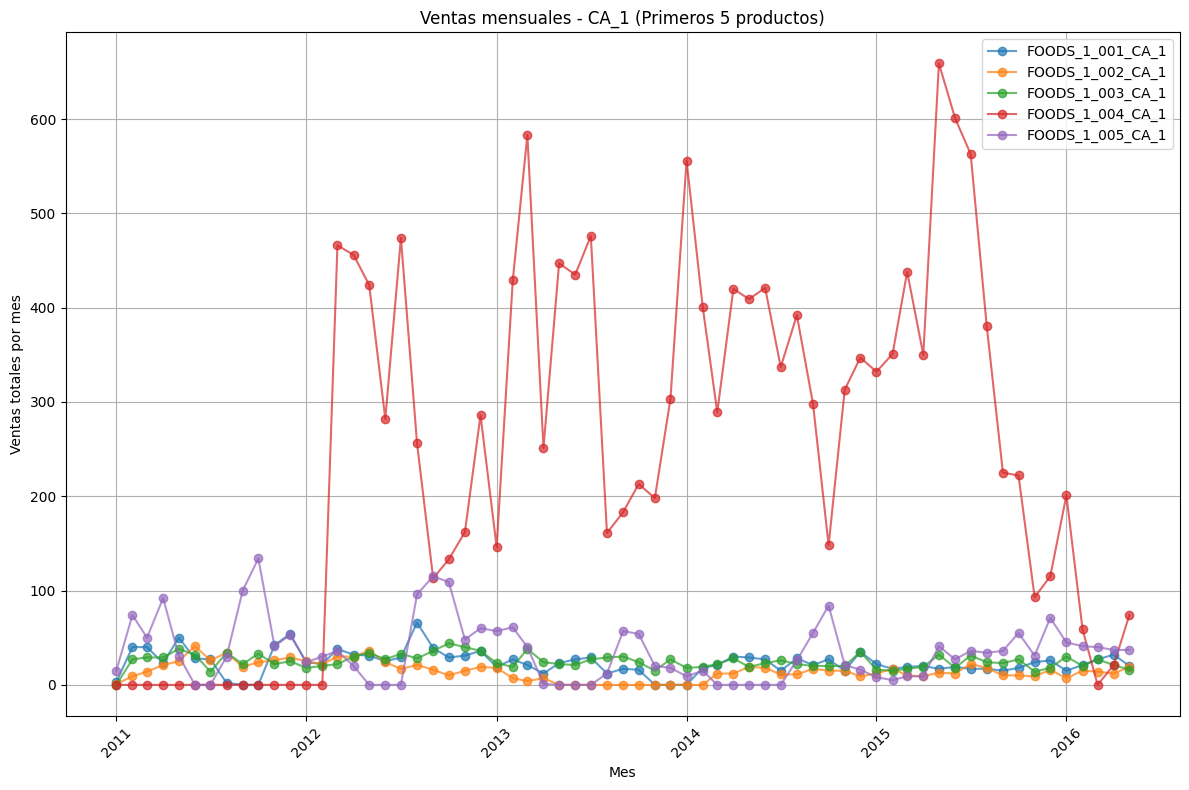


Estadísticas de ventas mensuales por producto en CA_1:

FOODS_1_001:
count    65.000000
mean     23.476923
std      12.654184
min       0.000000
25%      17.000000
50%      23.000000
75%      29.000000
max      66.000000
Name: sales, dtype: float64

FOODS_1_002:
count    65.000000
mean     14.369231
std       9.733270
min       0.000000
25%       9.000000
50%      14.000000
75%      19.000000
max      41.000000
Name: sales, dtype: float64

FOODS_1_003:
count    65.000000
mean     24.800000
std       7.616183
min       0.000000
25%      20.000000
50%      24.000000
75%      30.000000
max      44.000000
Name: sales, dtype: float64

FOODS_1_004:
count     65.000000
mean     244.492308
std      190.975303
min        0.000000
25%       59.000000
50%      251.000000
75%      409.000000
max      659.000000
Name: sales, dtype: float64

FOODS_1_005:
count     65.000000
mean      34.861538
std       32.166013
min        0.000000
25%        9.000000
50%       31.000000
75%       53.000000
max   

In [6]:
# Parámetros
chunk_size = 100_000
store_id = 'CA_1'
n_products = 5

# Obtener los primeros 5 productos únicos (repetimos para consistencia)
items = set()
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['item_id']):
    items.update(chunk['item_id'].unique())
    if len(items) >= n_products:
        break
items = sorted(list(items))[:n_products]

# Filtrar datos para CA_1 y los 5 productos, y agrupar por mes
filtered_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk_filtered = chunk[
        (chunk['store_id'] == store_id) & 
        (chunk['item_id'].isin(items))
    ][['item_id', 'date', 'sales']]
    filtered_data.append(chunk_filtered)

df_filtered = pd.concat(filtered_data, ignore_index=True)
df_filtered = df_filtered.sort_values(['item_id', 'date'])

# Agrupar por mes
df_filtered['month'] = df_filtered['date'].dt.to_period('M')
monthly_data = df_filtered.groupby(['item_id', 'month'])['sales'].sum().reset_index()
monthly_data['month'] = monthly_data['month'].dt.to_timestamp()

# Graficar series temporales mensuales
plt.figure(figsize=(12, 8))
for item_id in items:
    df_item = monthly_data[monthly_data['item_id'] == item_id]
    plt.plot(df_item['month'], df_item['sales'], label=f"{item_id}_{store_id}", marker='o', alpha=0.7)
plt.title(f"Ventas mensuales - {store_id} (Primeros {n_products} productos)")
plt.xlabel('Mes')
plt.ylabel('Ventas totales por mes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir estadísticas por producto (ventas mensuales)
print("\nEstadísticas de ventas mensuales por producto en CA_1:")
for item_id in items:
    sales = monthly_data[monthly_data['item_id'] == item_id]['sales']
    print(f"\n{item_id}:")
    print(sales.describe())

### Reducción de ruido:


Agrupar por meses ha suavizado significativamente las series, como esperábamos.

Esto hace que las series mensuales sean más adecuadas para modelar, ya que los modelos (como Prophet o ARIMA) pueden capturar patrones más fácilmente con datos menos ruidosos.


## Preparar un dataset mensual y seleccionar productos predecibles

In [7]:

# Parámetros
chunk_size = 100_000
min_items_per_store = 20  # Seleccionar 20 productos por tienda (200 combinaciones)
min_sales_threshold = 0.5  # Umbral: al menos 50% de meses con ventas > 0

# Agrupar por mes para todas las combinaciones
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad por combinación
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    # Desviación estándar (variabilidad)
    std_sales = sales.std()
    # Porcentaje de meses con ventas > 0
    non_zero_months = (sales > 0).mean()
    # Ventas promedio
    mean_sales = sales.mean()
    predictability_metrics.append({
        'item_id': item_id,
        'store_id': store_id,
        'std_sales': std_sales,
        'non_zero_months': non_zero_months,
        'mean_sales': mean_sales
    })

metrics_df = pd.DataFrame(predictability_metrics)

# Filtrar productos predecibles

# Criterio: non_zero_months >= 0.5 y ordenar por std_sales descendente
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
# Seleccionar los top 20 productos por tienda según std_sales
selected_items = (
    filtered_metrics.sort_values(['store_id', 'std_sales'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar el dataset mensual para los productos seleccionados
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]


# Imprimir resumen
print("=== Resumen del dataset mensual filtrado ===")
print(f"Número de filas: {len(df_selected):,}")
print(f"Productos únicos: {df_selected['item_id'].nunique():,}")
print(f"Tiendas únicas: {df_selected['store_id'].nunique():,}")
print(f"Meses únicos: {df_selected['month'].nunique():,}")
print("\nEstadísticas de ventas mensuales:")
print(df_selected['sales'].describe())
print("\nPrimeras 5 filas:")
print(df_selected.head())

=== Resumen del dataset mensual filtrado ===
Número de filas: 13,000
Productos únicos: 65
Tiendas únicas: 10
Meses únicos: 65

Estadísticas de ventas mensuales:
count    13000.000000
mean       575.015538
std        665.499646
min          0.000000
25%        126.000000
50%        410.000000
75%        794.250000
max      10821.000000
Name: sales, dtype: float64

Primeras 5 filas:
          item_id store_id      month  sales
2405  FOODS_1_004     WI_1 2011-01-01      0
2406  FOODS_1_004     WI_1 2011-02-01      0
2407  FOODS_1_004     WI_1 2011-03-01      0
2408  FOODS_1_004     WI_1 2011-04-01      0
2409  FOODS_1_004     WI_1 2011-05-01      0


### Tamaño del dataset:


Meses únicos: 65 

Tiendas únicas: 10 

Productos únicos: 65. 

El criterio de selección (non_zero_months >= 0.5, es decir, ventas en al menos 50% de los meses) fue demasiado estricto.

Número de filas: 13,000 

### Ajuste necesario:

Debemos relajar el criterio (por ejemplo, non_zero_months >= 0.2) para incluir más productos, o cambiar el criterio para priorizar productos con estacionalidad clara.

## Ajustar la selección de productos para obtener más combinaciones

In [8]:

from statsmodels.tsa.seasonal import seasonal_decompose

output_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20  # Seleccionar 20 productos por tienda (200 combinaciones)
min_sales_threshold = 0.2  # Umbral ajustado: al menos 20% de meses con ventas > 0

# Agrupar por mes para todas las combinaciones
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad por combinación
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:  # Al menos 2 años para capturar estacionalidad anual
        # Desviación estándar (variabilidad)
        std_sales = sales.std()
        # Porcentaje de meses con ventas > 0
        non_zero_months = (sales > 0).mean()
        # Ventas promedio
        mean_sales = sales.mean()
        # Calcular fuerza estacional
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        # Combinar seasonal_strength y mean_sales para priorizar
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'std_sales': std_sales,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'seasonal_strength': seasonal_strength,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)

# Filtrar productos predecibles
# Criterio: non_zero_months >= 0.2 y ordenar por combined_score descendente
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
# Seleccionar los top 20 productos por tienda según combined_score
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar el dataset mensual para los productos seleccionados
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Guardar el dataset mensual filtrado
df_selected.to_csv(output_path, index=False)

# Imprimir resumen
print("=== Resumen del dataset mensual filtrado (final) ===")
print(f"Número de filas: {len(df_selected):,}")
print(f"Productos únicos: {df_selected['item_id'].nunique():,}")
print(f"Tiendas únicas: {df_selected['store_id'].nunique():,}")
print(f"Meses únicos: {df_selected['month'].nunique():,}")
print("\nEstadísticas de ventas mensuales:")
print(df_selected['sales'].describe())
print("\nPrimeras 5 filas:")
print(df_selected.head())

=== Resumen del dataset mensual filtrado (final) ===
Número de filas: 13,000
Productos únicos: 72
Tiendas únicas: 10
Meses únicos: 65

Estadísticas de ventas mensuales:
count    13000.000000
mean       602.315308
std        647.270844
min          0.000000
25%        210.000000
50%        423.000000
75%        781.000000
max      10821.000000
Name: sales, dtype: float64

Primeras 5 filas:
           item_id store_id      month  sales
29055  FOODS_1_046     WI_1 2011-01-01     37
29056  FOODS_1_046     WI_1 2011-02-01    102
29057  FOODS_1_046     WI_1 2011-03-01    213
29058  FOODS_1_046     WI_1 2011-04-01    101
29059  FOODS_1_046     WI_1 2011-05-01    115



#### Muchas combinaciones (item_id, store_id) tienen ventas en menos del 20% de los meses, o no tienen suficiente estacionalidad o ventas para ser seleccionadas.

#### Es posible que solo ~72 productos (de los 3,049 posibles) cumplan con tener datos suficientes (al menos 24 meses) y un combined_score relevante.

#### No alcanzamos los 200 productos esperados (20 por tienda × 10 tiendas). Esto sugiere que las ventas son muy esporádicas incluso a nivel mensual, y muchos productos no tienen patrones predecibles.


#### Las ventas mensuales tienen menos ceros y son más consistentes que las diarias, pero la alta variabilidad indica que necesitamos un modelo robusto a fluctuaciones y valores atípicos.

#### Vamos a proceder con este dataset y pasar a modelado, ya que hemos ajustado los criterios varias veces y el número de productos no aumenta significativamente.

# PROPHET Model

In [9]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

input_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")


# Cargar datos
df = pd.read_csv(input_path)
df['month'] = pd.to_datetime(df['month'])

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df.groupby(['item_id', 'store_id']):
    # Preparar datos para Prophet (columnas 'ds' y 'y')
    prophet_df = group[['month', 'sales']].rename(columns={'month': 'ds', 'sales': 'y'})
    if len(prophet_df) >= 24:  # Asegurar suficientes datos
        # Transformación logarítmica para manejar valores atípicos
        prophet_df['y'] = np.log1p(prophet_df['y'])
        # Ajustar modelo Prophet
        model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode='multiplicative'  # Mejor para datos con crecimiento no lineal
        )
        model.fit(prophet_df[:-1])  # Excluir el último mes para validación
        # Crear DataFrame para predicción
        future = model.make_future_dataframe(periods=1, freq='M')
        forecast = model.predict(future)
        # Obtener predicción y valor real
        pred_log = forecast['yhat'].iloc[-1]
        pred = np.expm1(pred_log)  # Invertir transformación logarítmica
        real_log = prophet_df['y'].iloc[-1]
        real = np.expm1(real_log)
        # Guardar resultados
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(prophet_df['ds'].iloc[-1])

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Prophet):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas de los resultados
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())

Importing plotly failed. Interactive plots will not work.


15:08:33 - cmdstanpy - INFO - Chain [1] start processing
15:08:33 - cmdstanpy - INFO - Chain [1] done processing
15:08:33 - cmdstanpy - INFO - Chain [1] start processing
15:08:33 - cmdstanpy - INFO - Chain [1] done processing
15:08:33 - cmdstanpy - INFO - Chain [1] start processing
15:08:33 - cmdstanpy - INFO - Chain [1] done processing
15:08:33 - cmdstanpy - INFO - Chain [1] start processing
15:08:33 - cmdstanpy - INFO - Chain [1] done processing
15:08:33 - cmdstanpy - INFO - Chain [1] start processing
15:08:33 - cmdstanpy - INFO - Chain [1] done processing
15:08:33 - cmdstanpy - INFO - Chain [1] start processing
15:08:34 - cmdstanpy - INFO - Chain [1] done processing
15:08:34 - cmdstanpy - INFO - Chain [1] start processing
15:08:34 - cmdstanpy - INFO - Chain [1] done processing
15:08:34 - cmdstanpy - INFO - Chain [1] start processing
15:08:34 - cmdstanpy - INFO - Chain [1] done processing
15:08:34 - cmdstanpy - INFO - Chain [1] start processing
15:08:34 - cmdstanpy - INFO - Chain [1]


 Evaluación del modelo (Prophet):
➡️  MSE:  3307637.37
➡️  MAE:  444.76
➡️  R²:   -17.9970

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       137.706182
1  FOODS_1_055_CA_2 2016-05-01       108.0        11.496034
2  FOODS_1_104_CA_2 2016-05-01       158.0        61.198585
3  FOODS_1_161_CA_4 2016-05-01        13.0       106.916238
4  FOODS_1_217_CA_2 2016-05-01       166.0         5.251017


# Preparar un dataset trimestral con características externas y entrenar PROPHET con estas características

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")


# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2

# Cargar datos y agregar características externas
quarterly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['quarter'] = chunk['date'].dt.to_period('Q')
    # Agrupar por trimestre, sumar sales, y tomar el primer valor de características categóricas
    chunk_quarterly = chunk.groupby(['item_id', 'store_id', 'quarter']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    quarterly_data.append(chunk_quarterly)

df_quarterly = pd.concat(quarterly_data, ignore_index=True)
df_quarterly = df_quarterly.groupby(['item_id', 'store_id', 'quarter']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_quarterly['quarter'] = df_quarterly['quarter'].dt.to_timestamp()

# Calcular métricas de predictibilidad
predictability_metrics = []
for (item_id, store_id), group in df_quarterly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 8:  # Al menos 2 años para estacionalidad
        std_sales = sales.std()
        non_zero_quarters = (sales > 0).mean()
        mean_sales = sales.mean()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=4)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_quarters': non_zero_quarters,
            'mean_sales': mean_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[metrics_df['non_zero_quarters'] >= min_sales_threshold]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset trimestral
df_selected = df_quarterly[
    df_quarterly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Entrenar Prophet con características externas
predictions = []
real_values = []
item_store_combinations = []
quarters = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    prophet_df = group[['quarter', 'sales', 'event_name_1', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']].rename(columns={'quarter': 'ds', 'sales': 'y'})
    if len(prophet_df) >= 8:
        # Transformación logarítmica
        prophet_df['y'] = np.log1p(prophet_df['y'])
        # Manejar características externas
        prophet_df['event_name_1'] = prophet_df['event_name_1'].notnull().astype(int)  # 1 si hay evento, 0 si no
        prophet_df['snap'] = prophet_df.apply(
            lambda x: x['snap_CA'] if store_id.startswith('CA') else (x['snap_TX'] if store_id.startswith('TX') else x['snap_WI']),
            axis=1
        )
        prophet_df['sell_price'] = prophet_df['sell_price'].fillna(prophet_df['sell_price'].mean())
        # Ajustar modelo Prophet
        model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode='additive'  # Cambiar a aditivo para series con fluctuaciones agresivas
        )
        model.add_regressor('event_name_1')
        model.add_regressor('snap')
        model.add_regressor('sell_price')
        model.fit(prophet_df[:-1])
        # Predecir
        future = model.make_future_dataframe(periods=1, freq='Q')
        future['event_name_1'] = prophet_df['event_name_1'].iloc[-1]
        future['snap'] = prophet_df['snap'].iloc[-1]
        future['sell_price'] = prophet_df['sell_price'].iloc[-1]
        forecast = model.predict(future)
        pred_log = forecast['yhat'].iloc[-1]
        pred = np.expm1(pred_log)
        real_log = prophet_df['y'].iloc[-1]
        real = np.expm1(real_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        quarters.append(prophet_df['ds'].iloc[-1])

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'quarter': quarters,
    'real_sales': real_values,
    'predicted_sales': predictions
})


# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Prophet con características externas, trimestral):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())

15:10:18 - cmdstanpy - INFO - Chain [1] start processing
15:10:18 - cmdstanpy - INFO - Chain [1] done processing
15:10:18 - cmdstanpy - INFO - Chain [1] start processing
15:10:18 - cmdstanpy - INFO - Chain [1] done processing
15:10:18 - cmdstanpy - INFO - Chain [1] start processing
15:10:18 - cmdstanpy - INFO - Chain [1] done processing
15:10:18 - cmdstanpy - INFO - Chain [1] start processing
15:10:19 - cmdstanpy - INFO - Chain [1] done processing
15:10:19 - cmdstanpy - INFO - Chain [1] start processing
15:10:19 - cmdstanpy - INFO - Chain [1] done processing
15:10:19 - cmdstanpy - INFO - Chain [1] start processing
15:10:19 - cmdstanpy - INFO - Chain [1] done processing
15:10:19 - cmdstanpy - INFO - Chain [1] start processing
15:10:19 - cmdstanpy - INFO - Chain [1] done processing
15:10:19 - cmdstanpy - INFO - Chain [1] start processing
15:10:19 - cmdstanpy - INFO - Chain [1] done processing
15:10:19 - cmdstanpy - INFO - Chain [1] start processing
15:10:19 - cmdstanpy - INFO - Chain [1]


 Evaluación del modelo (Prophet con características externas, trimestral):
➡️  MSE:  13055206837.06
➡️  MAE:  13155.80
➡️  R²:   -13672.3236

Primeras 5 filas de los resultados:
         item_store    quarter  real_sales  predicted_sales
0  FOODS_1_005_CA_2 2016-04-01       269.0       367.185540
1  FOODS_1_055_CA_2 2016-04-01       251.0       345.914370
2  FOODS_1_104_CA_2 2016-04-01       363.0       855.849235
3  FOODS_1_217_CA_2 2016-04-01       446.0       255.889735
4  FOODS_2_019_CA_1 2016-04-01       801.0       857.524940


# Volver a datos mensuales y probar un modelo más simple (ARIMA)

In [11]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")  # Ignorar advertencias de convergencia de ARIMA

input_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")


# Cargar datos
df = pd.read_csv(input_path)
df['month'] = pd.to_datetime(df['month'])

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df.groupby(['item_id', 'store_id']):
    sales = group['sales'].values
    if len(sales) >= 24:  # Asegurar suficientes datos para ARIMA
        # Transformación logarítmica para manejar valores atípicos
        sales_log = np.log1p(sales)
        # Ajustar modelo ARIMA
        try:
            model = ARIMA(sales_log[:-1], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
            model_fit = model.fit()
            # Predecir el próximo mes
            pred_log = model_fit.forecast(steps=1)[0]
            pred = np.expm1(pred_log)  # Invertir transformación logarítmica
            real_log = sales_log[-1]
            real = np.expm1(real_log)
            # Guardar resultados
            predictions.append(pred)
            real_values.append(real)
            item_store_combinations.append(f"{item_id}_{store_id}")
            months.append(group['month'].iloc[-1])
        except Exception as e:
            print(f"No se pudo ajustar ARIMA para {item_id}_{store_id}: {e}")
            continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})


# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (ARIMA, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


 Evaluación del modelo (ARIMA, mensual):
➡️  MSE:  298328.52
➡️  MAE:  253.75
➡️  R²:   -0.7134

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       237.188804
1  FOODS_1_055_CA_2 2016-05-01       108.0      4036.517285
2  FOODS_1_104_CA_2 2016-05-01       158.0        30.701104
3  FOODS_1_161_CA_4 2016-05-01        13.0        68.231229
4  FOODS_1_217_CA_2 2016-05-01       166.0        20.267286


# Probar un modelo LinearRegression con características externas

In [12]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")


# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad (mismo proceso que en Paso 6)
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Dividir datos (entrenar con todo menos el último mes)
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test = X.iloc[-1:]
    real_log = y.iloc[-1]
    real = np.expm1(real_log)
    # Ajustar modelo de regresión lineal
    try:
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred_log = model.predict(X_test)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(group['month'].iloc[-1])
    except Exception as e:
        print(f"No se pudo ajustar regresión para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})


# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Regresión Lineal, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


 Evaluación del modelo (Regresión Lineal, mensual):
➡️  MSE:  586758.71
➡️  MAE:  227.37
➡️  R²:   -2.3700

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       199.569167
1  FOODS_1_055_CA_2 2016-05-01       108.0        54.859152
2  FOODS_1_104_CA_2 2016-05-01       158.0       410.784728
3  FOODS_1_161_CA_4 2016-05-01        13.0       185.836009
4  FOODS_1_217_CA_2 2016-05-01       166.0       512.457814


# Probar un modelo no lineal (Random Forest) para capturar relaciones complejas

In [13]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")


# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad (mismo proceso que en Paso 6)
from statsmodels.tsa.seasonal import seasonal_decompose
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Dividir datos (entrenar con todo menos el último mes)
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test = X.iloc[-1:]
    real_log = y.iloc[-1]
    real = np.expm1(real_log)
    # Ajustar modelo Random Forest
    try:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        pred_log = model.predict(X_test)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(group['month'].iloc[-1])
    except Exception as e:
        print(f"No se pudo ajustar Random Forest para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})


# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Random Forest, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


 Evaluación del modelo (Random Forest, mensual):
➡️  MSE:  52269.30
➡️  MAE:  151.85
➡️  R²:   0.6998

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       209.812814
1  FOODS_1_055_CA_2 2016-05-01       108.0       122.255454
2  FOODS_1_104_CA_2 2016-05-01       158.0       198.724558
3  FOODS_1_161_CA_4 2016-05-01        13.0       123.641114
4  FOODS_1_217_CA_2 2016-05-01       166.0       150.564840


## Optimizar Random Forest y manejar series con ventas bajas

Optimizar Random Forest ajustando hiperparámetros (por ejemplo, número de árboles, profundidad máxima).

Excluir series con ventas muy bajas (por ejemplo, mediana < 50) para reducir el impacto de errores relativos extremos.

Reentrenar el modelo y evaluar las métricas.

In [14]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_rf_optimized_monthly.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2
min_median_sales = 50  # Excluir series con mediana < 50

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        median_sales = sales.median()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'median_sales': median_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[
    (metrics_df['non_zero_months'] >= min_sales_threshold) &
    (metrics_df['median_sales'] >= min_median_sales)
]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Dividir datos (entrenar con todo menos el último mes)
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test = X.iloc[-1:]
    real_log = y.iloc[-1]
    real = np.expm1(real_log)
    # Ajustar modelo Random Forest con hiperparámetros optimizados
    try:
        model = RandomForestRegressor(
            n_estimators=200,  # Más árboles
            max_depth=10,      # Limitar profundidad para evitar sobreajuste
            min_samples_split=5,
            random_state=42
        )
        model.fit(X_train, y_train)
        pred_log = model.predict(X_test)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(group['month'].iloc[-1])
    except Exception as e:
        print(f"No se pudo ajustar Random Forest para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Random Forest Optimizado, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


 Evaluación del modelo (Random Forest Optimizado, mensual):
➡️  MSE:  49962.53
➡️  MAE:  146.70
➡️  R²:   0.7141

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       216.733306
1  FOODS_1_055_CA_2 2016-05-01       108.0       128.921054
2  FOODS_1_104_CA_2 2016-05-01       158.0       196.983287
3  FOODS_1_161_CA_4 2016-05-01        13.0       121.443872
4  FOODS_1_217_CA_2 2016-05-01       166.0       149.415001


## Visualizar predicciones del Random Forest optimizado y analizar errores

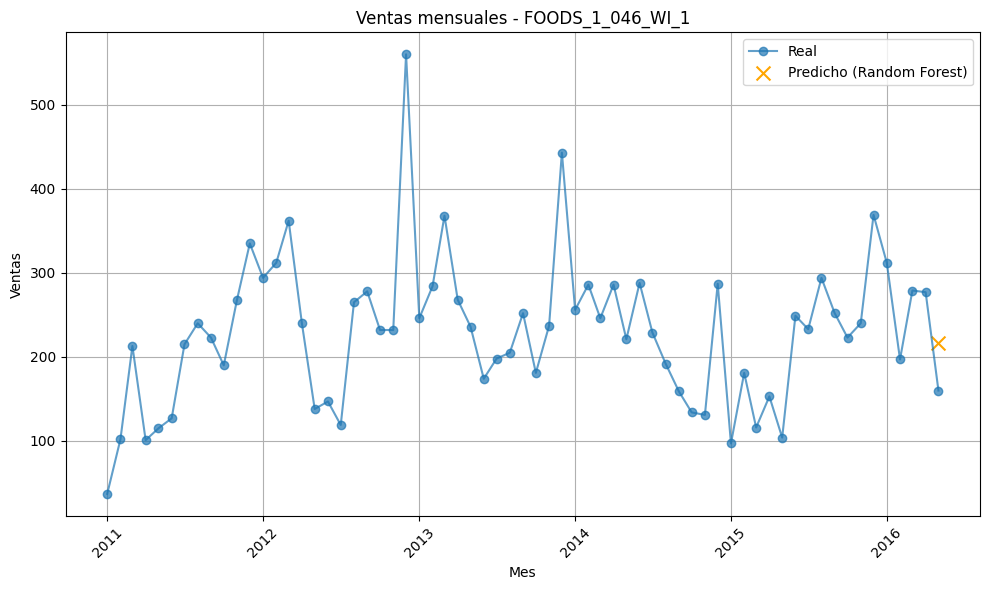

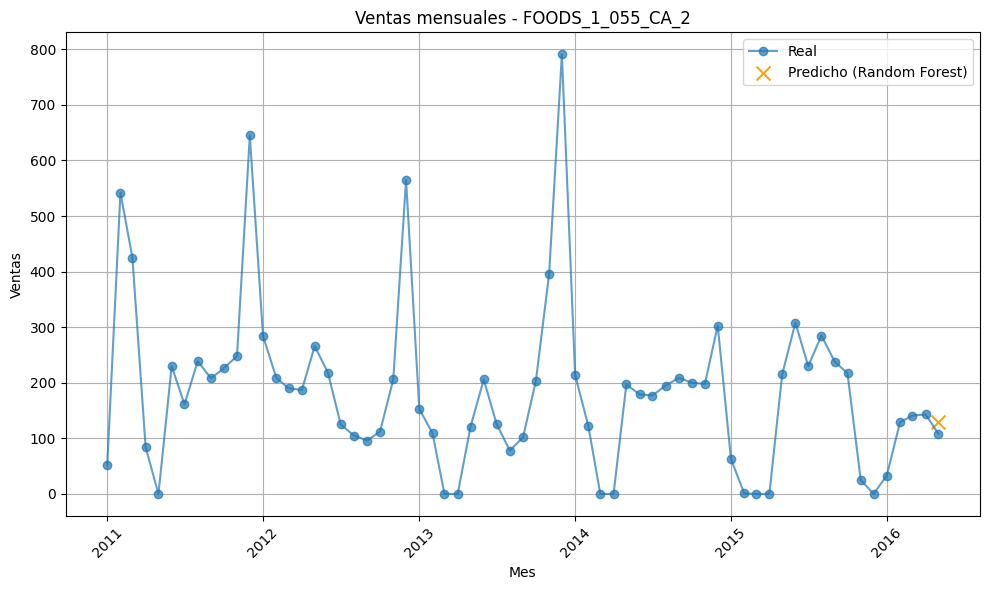

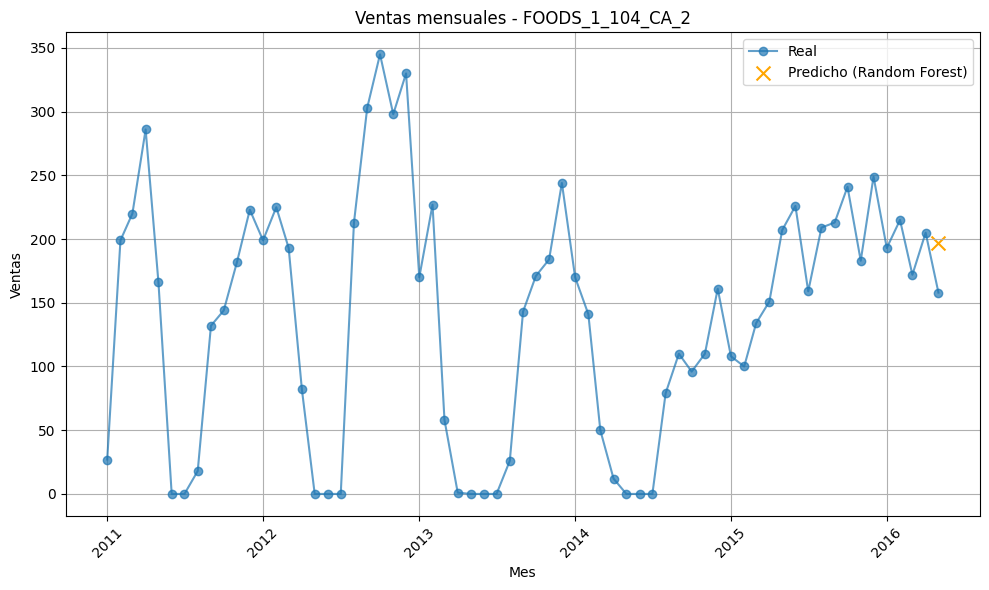

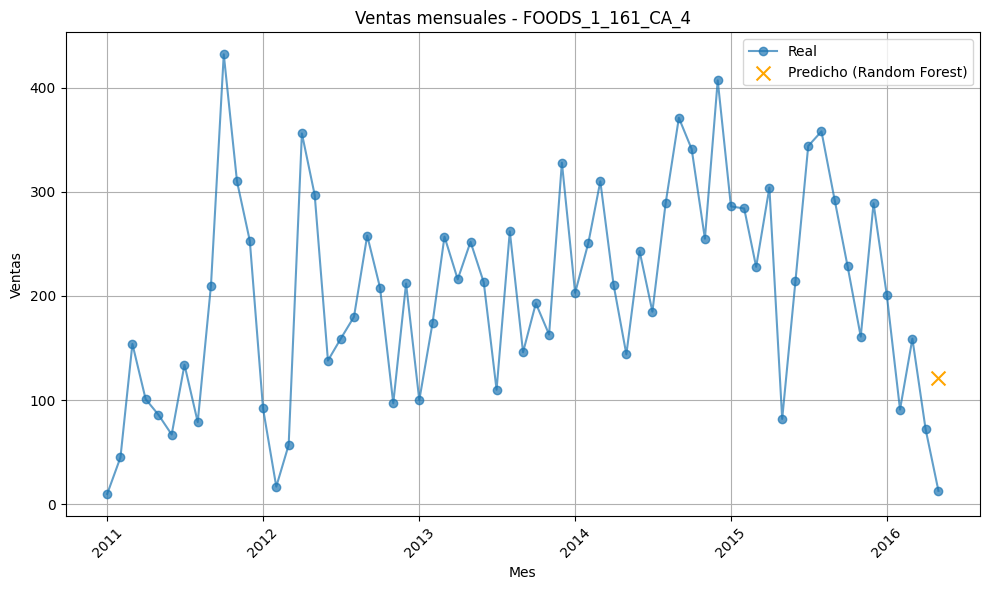

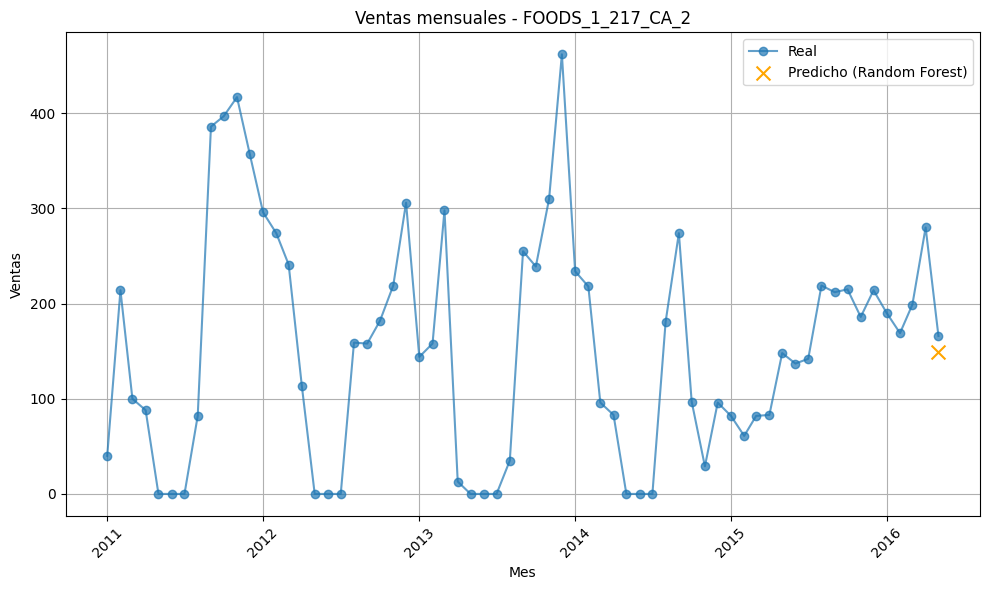


Estadísticas de las series graficadas:

FOODS_1_046_WI_1:
count     65.000000
mean     229.046154
std       87.504898
min       37.000000
25%      174.000000
50%      233.000000
75%      278.000000
max      560.000000
Name: sales, dtype: float64

FOODS_1_055_CA_2:
count     65.000000
mean     185.184615
std      153.253252
min        0.000000
25%      102.000000
50%      187.000000
75%      226.000000
max      791.000000
Name: sales, dtype: float64

FOODS_1_104_CA_2:
count     65.000000
mean     139.400000
std       96.280158
min        0.000000
25%       50.000000
50%      159.000000
75%      209.000000
max      345.000000
Name: sales, dtype: float64

FOODS_1_161_CA_4:
count     65.000000
mean     202.815385
std      100.910216
min       10.000000
25%      134.000000
50%      210.000000
75%      284.000000
max      432.000000
Name: sales, dtype: float64

FOODS_1_217_CA_2:
count     65.000000
mean     154.400000
std      119.678449
min        0.000000
25%       61.000000
50%      158.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")
results_path = os.path.join(current_dir, "../data/csv_model/validation_rf_optimized_monthly.csv")

# Cargar datos
df = pd.read_csv(data_path)
df['month'] = pd.to_datetime(df['month'])
results = pd.read_csv(results_path)
results['month'] = pd.to_datetime(results['month'])

# Visualizar series reales y predicciones
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    parts = item_store.split('_')
    item_id = '_'.join(parts[:-2])
    store_id = '_'.join(parts[-2:])
    # Filtrar datos reales
    df_item = df[(df['item_id'] == item_id) & (df['store_id'] == store_id)]
    df_item = df_item.sort_values('month')
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(df_item['month'], df_item['sales'], label='Real', marker='o', alpha=0.7)
    plt.scatter(row['month'], row['predicted_sales'], color='orange', label='Predicho (Random Forest)', marker='x', s=100)
    plt.title(f"Ventas mensuales - {item_store}")
    plt.xlabel('Mes')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Imprimir estadísticas de las series graficadas
print("\nEstadísticas de las series graficadas:")
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    parts = item_store.split('_')
    item_id = '_'.join(parts[:-2])
    store_id = '_'.join(parts[-2:])
    sales = df[(df['item_id'] == item_id) & (df['store_id'] == store_id)]['sales']
    print(f"\n{item_store}:")
    print(sales.describe())

# Probamos con un modelo XGBOOST para intentar capturar patrones mas complejos que con el modelo RANDOM FOREST

In [16]:

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle


total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_xgb_optimized_monthly.csv")
models_dir = os.path.join(current_dir, "../models/")
data_output_path = os.path.join(current_dir, "../data/raw/Final_XGBoost_data_processed.csv")

# Crear directorio para guardar los modelos si no existe
os.makedirs(models_dir, exist_ok=True)

# Parámetros iniciales
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2
min_median_sales = 100
min_sales_value = 20
max_cv = 1.0

# Cargar y procesar datos
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Filtrar series predecibles (mismo proceso que antes)
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        median_sales = sales.median()
        min_sales = sales.min()
        std_sales = sales.std()
        cv_sales = std_sales / mean_sales if mean_sales > 0 else float('inf')
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'median_sales': median_sales,
            'min_sales': min_sales,
            'cv_sales': cv_sales
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[
    (metrics_df['non_zero_months'] >= min_sales_threshold) &
    (metrics_df['median_sales'] >= min_median_sales) &
    (metrics_df['min_sales'] >= min_sales_value) &
    (metrics_df['cv_sales'] <= max_cv)
]
selected_items = metrics_df.groupby('store_id').apply(lambda x: x.nlargest(min_items_per_store, 'median_sales')).reset_index(drop=True)

df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if 'CA' in x['store_id'] else (x['snap_TX'] if 'TX' in x['store_id'] else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
for lag in [1, 2, 3, 6, 12]:
    df_selected[f'lag_{lag}'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(lag)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = pd.get_dummies(df_selected, columns=['month_num'], prefix='month')
df_selected = df_selected.dropna()

# Guardar el dataset filtrado en un archivo CSV
df_selected.to_csv(data_output_path, index=False)
print("\nDataset filtrado guardado en:", data_output_path)

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    group['sales_log'] = np.log1p(group['sales'])
    features = ['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_2', 'lag_3', 'lag_6', 'lag_12', 'rolling_mean_3', 'year'] + [col for col in group.columns if col.startswith('month_')]
    X = group[features]
    y = group['sales_log']
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test, y_test = X.iloc[-1:], y.iloc[-1]
    real = np.expm1(y_test)

    # Optimizar hiperparámetros con Grid Search
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    model = XGBRegressor(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Guardar el modelo con pickle
    item_store = f"{item_id}_{store_id}"
    model_filename = os.path.join(models_dir, f"Final_model_XGBOOST_{item_store}.sav")
    with open(model_filename, 'wb') as file:
        pickle.dump(best_model, file)

    pred_log = best_model.predict(X_test)[0]
    pred = np.expm1(pred_log)

    predictions.append(pred)
    real_values.append(real)
    item_store_combinations.append(item_store)
    months.append(group['month'].iloc[-1])

# Guardar resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n📊 Evaluación del modelo (XGBoost Optimizado, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())
print("\nModelos guardados en:", models_dir)


Dataset filtrado guardado en: /Users/julian/Desktop/final_project_main/Machine_Learning_Based_Demand_Forecasting/Walmart/src/../data/raw/Final_XGBoost_data_processed.csv

📊 Evaluación del modelo (XGBoost Optimizado, mensual):
➡️  MSE:  43670.80
➡️  MAE:  151.13
➡️  R²:   0.6905

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_012_CA_2 2016-05-01       262.0       343.861206
1  FOODS_1_032_WI_1 2016-05-01       171.0       266.425873
2  FOODS_1_043_CA_2 2016-05-01       326.0        45.559261
3  FOODS_1_085_WI_1 2016-05-01       286.0       363.689026
4  FOODS_1_218_CA_2 2016-05-01       246.0       354.790802

Modelos guardados en: /Users/julian/Desktop/final_project_main/Machine_Learning_Based_Demand_Forecasting/Walmart/src/../models/


## Preparar el modelo para predecir el próximo mes (junio 2016) para todas las combinaciones

El modelo XGBoost tiene un MAE y un R² que lo hace adecuado para predecir las ventas mensuales.

In [17]:

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import joblib


total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/predictions_june_2016_xgb.csv")

# Parámetros iniciales
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2
min_median_sales = 100
min_sales_value = 20
max_cv = 1.0

# Cargar y procesar datos
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Filtrar series predecibles
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        median_sales = sales.median()
        min_sales = sales.min()
        std_sales = sales.std()
        cv_sales = std_sales / mean_sales if mean_sales > 0 else float('inf')
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'median_sales': median_sales,
            'min_sales': min_sales,
            'cv_sales': cv_sales
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[
    (metrics_df['non_zero_months'] >= min_sales_threshold) &
    (metrics_df['median_sales'] >= min_median_sales) &
    (metrics_df['min_sales'] >= min_sales_value) &
    (metrics_df['cv_sales'] <= max_cv)
]
selected_items = filtered_metrics.groupby('store_id').apply(lambda x: x.nlargest(min_items_per_store, 'median_sales')).reset_index(drop=True)

df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if 'CA' in x['store_id'] else (x['snap_TX'] if 'TX' in x['store_id'] else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
for lag in [1, 2, 3, 6, 12]:
    df_selected[f'lag_{lag}'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(lag)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = pd.get_dummies(df_selected, columns=['month_num'], prefix='month')
df_selected = df_selected.dropna()

# Preparar predicciones para junio 2016
predictions = []
item_store_combinations = []
next_month = pd.to_datetime("2016-06-01")  # Junio 2016

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    features = ['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_2', 'lag_3', 'lag_6', 'lag_12', 'rolling_mean_3', 'year'] + [col for col in group.columns if col.startswith('month_')]
    X = group[features]
    y = group['sales_log']

    # Entrenar con todos los datos disponibles
    try:
        # Optimizar hiperparámetros con Grid Search
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
        model = XGBRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_


        # Preparar datos para predecir junio 2016
        last_row = group.iloc[-1]
        next_features = {
            'event_name_1': last_row['event_name_1'],  # Usar el último valor conocido
            'snap': last_row['snap'],
            'sell_price': last_row['sell_price'],
            'lag_1': last_row['sales'],  # Último valor de sales
            'lag_2': group['sales'].iloc[-2] if len(group) >= 2 else group['sales'].mean(),
            'lag_3': group['sales'].iloc[-3] if len(group) >= 3 else group['sales'].mean(),
            'lag_6': group['sales'].iloc[-6] if len(group) >= 6 else group['sales'].mean(),
            'lag_12': group['sales'].iloc[-12] if len(group) >= 12 else group['sales'].mean(),
            'rolling_mean_3': group['sales'].tail(3).mean(),
            'year': 2016,
            'month_1': 0, 'month_2': 0, 'month_3': 0, 'month_4': 0, 'month_5': 0, 'month_6': 1,
            'month_7': 0, 'month_8': 0, 'month_9': 0, 'month_10': 0, 'month_11': 0, 'month_12': 0
        }
        X_next = pd.DataFrame([next_features])
        pred_log = best_model.predict(X_next)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        item_store_combinations.append(f"{item_id}_{store_id}")
    except Exception as e:
        print(f"No se pudo predecir para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con predicciones para junio 2016
predictions_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': [next_month] * len(item_store_combinations),
    'predicted_sales': predictions
})

# Guardar predicciones
predictions_df.to_csv(output_path, index=False)

print("\nPredicciones para junio 2016 con XGBoost guardadas en:", output_path)
print("\nPrimeras 5 filas de las predicciones:")
print(predictions_df.head())


Predicciones para junio 2016 con XGBoost guardadas en: /Users/julian/Desktop/final_project_main/Machine_Learning_Based_Demand_Forecasting/Walmart/src/../data/csv_model/predictions_june_2016_xgb.csv

Primeras 5 filas de las predicciones:
         item_store      month  predicted_sales
0  FOODS_1_018_CA_1 2016-06-01       273.706055
1  FOODS_1_018_WI_1 2016-06-01       175.423660
2  FOODS_1_046_TX_2 2016-06-01        70.236687
3  FOODS_1_046_WI_1 2016-06-01       203.377487
4  FOODS_1_085_CA_1 2016-06-01       222.980316
